In [44]:
import importer
import numpy as np
import matplotlib.pyplot as plt
import torch as t
import random

## Pre-processing

In the interest of brevity, all pre-processing for this dataset has been done in the importer module inside this repository. This module servers a few purposes:
- Removes all rows where there is a column containing no data.
- Allows partitioning of data
- Converts the 'Activity Date' field into the seconds from the Unix epoch

In [45]:
data_set = importer.Data()

# Get all headers that contain numeric data
headers = []
for i in range(len(data_set.headers)):
    if data_set.types[i] != 'string' and data_set.types[i] != 'bool':
        headers.append(data_set.headers[i])

# Remove headers which have not been recorded for many activities
for header in headers:
    if len(data_set.get_data([header])[header]) < 100:
        headers.remove(header)

headers.append('Activity Gear')

# Manually select headers for debugging
headers = ['Average Speed', 'Average Watts', 'Activity Gear']

features = data_set.get_data(headers)
print('This leaves us with the following list of', len(headers), 'headers: ', headers, '\n')
print('This reduces the number of activities to ', len(features[headers[0]]))

X, Y = importer.separate_x_y(features, 'Activity Gear')

This leaves us with the following list of 3 headers:  ['Average Speed', 'Average Watts', 'Activity Gear'] 

This reduces the number of activities to  79


## K-Nearest-Neighbours (KNN)

This classification algorithm works by determining which class a datapoint is in based on which class its neighbours are in.

tensor([[[[  4.0024, 157.4849]]],


        [[[  4.2006, 156.5774]]],


        [[[  4.3649, 163.1079]]],


        [[[  4.7239, 171.3081]]],


        [[[  4.9260, 168.2674]]],


        [[[  4.5687, 168.1562]]],


        [[[  4.0074, 181.3736]]],


        [[[  4.7669, 166.0498]]],


        [[[  5.0612, 175.0098]]],


        [[[  4.9059, 173.3633]]],


        [[[  3.8717, 154.9083]]],


        [[[  4.5887, 172.4187]]],


        [[[  4.1175, 130.3326]]],


        [[[  5.7799, 183.1008]]],


        [[[  5.1010, 178.2981]]],


        [[[  5.8415, 124.7946]]],


        [[[  5.2643, 177.1310]]],


        [[[  4.5716, 168.4439]]],


        [[[  4.8142, 110.7959]]],


        [[[  6.3626, 125.9447]]],


        [[[  5.4483, 109.9030]]],


        [[[  4.4100, 160.7438]]],


        [[[  5.3068, 109.2583]]],


        [[[  5.2845, 114.5815]]],


        [[[  5.9644, 111.5019]]],


        [[[  5.3579, 119.0664]]],


        [[[  5.3648, 107.2055]]],


        [[[  5.9021, 111.856

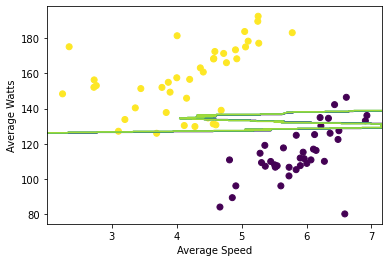

In [46]:
Y, class_code = importer.code_classes(Y)
X = t.tensor(X).float()
Y = t.tensor(Y).float()[:, None]

def plot(K):
    fig, ax = plt.subplots()
    ax.set_xlabel(headers[0])
    ax.set_ylabel(headers[1])
    ax.scatter(X[:, 0], X[:, 1], c=Y[:, 0]);

    x0range = t.linspace(*ax.get_xlim(), 500)
    x1range = t.linspace(*ax.get_ylim(), 500)

    x0s, x1s = t.meshgrid(x0range, x1range)
    xs = t.stack([x0s, x1s], -1)

    X_exp = X[:, None, None, :]
    print(X_exp)

    dist2 = ((X_exp - xs)**2).sum(-1)
    elems = (-dist2).topk(K, dim=0).indices
    print(elems)
    pred = (0.5<Y[elems, 0].float().mean(0)).float()
    ax.contour(x0s, x1s, pred)

plot(5)